AIRLINE PASSAGER SATISFACTION 

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV,RandomizedSearchCV ,cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report ,roc_auc_score, roc_curve , auc


Importing And Reading the Data

In [3]:
df = pd.read_csv(r"D:\Data Scientist BIA\Personal Project\airline_passenger_satisfaction_fff.csv")

df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70001 entries, 0 to 70000
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         70001 non-null  int64  
 1   Gender                             70001 non-null  object 
 2   customer_type                      70001 non-null  object 
 3   age                                70001 non-null  int64  
 4   type_of_travel                     70001 non-null  object 
 5   customer_class                     70001 non-null  object 
 6   flight_distance                    70001 non-null  int64  
 7   inflight_wifi_service              70001 non-null  int64  
 8   departure_arrival_time_convenient  70001 non-null  int64  
 9   ease_of_online_booking             70001 non-null  int64  
 10  gate_location                      70001 non-null  int64  
 11  food_and_drink                     70001 non-null  int

In [5]:
df.shape

(70001, 24)

In [6]:
df.describe(include='all')

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,70001.000000,70001,70001,70001.000000,70001,70001,70001.000000,70001.000000,70001.000000,70001.000000,...,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,70001.000000,69790.000000,70001
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,35551,57154,NaN,48327,33450,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39590
mean,35000.000000,NaN,NaN,39.388109,NaN,NaN,1188.081699,2.731932,3.059371,2.755903,...,3.357923,3.382366,3.348209,3.635048,3.307224,3.641719,3.288639,14.763832,15.117725,NaN
std,20207.692434,NaN,NaN,15.102944,NaN,NaN,996.505327,1.329547,1.527244,1.399368,...,1.334152,1.287997,1.312584,1.180457,1.263288,1.174967,1.314323,38.018866,38.546053,NaN
min,0.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,17500.000000,NaN,NaN,27.000000,NaN,NaN,413.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,35000.000000,NaN,NaN,40.000000,NaN,NaN,838.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,52500.000000,NaN,NaN,51.000000,NaN,NaN,1742.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             211
satisfaction                           0
dtype: int64

Data Processing 

In [9]:
df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].mean(), inplace=True)

In [10]:
df['arrival_delay_in_minutes'].isnull().sum()

0

In [11]:
# Renaming the 'Name' column to 'Full Name'
df.rename(columns={'Unnamed: 0': 'SR.NO'}, inplace=True)
df.head()

,SR.NO,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
df.set_index('SR.NO', inplace=True)
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
SR.NO,,,,,,,,,,,,,,,,,,,,,
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Visualization of Data

Text(0.5, 1.0, 'Satisfaction Count')

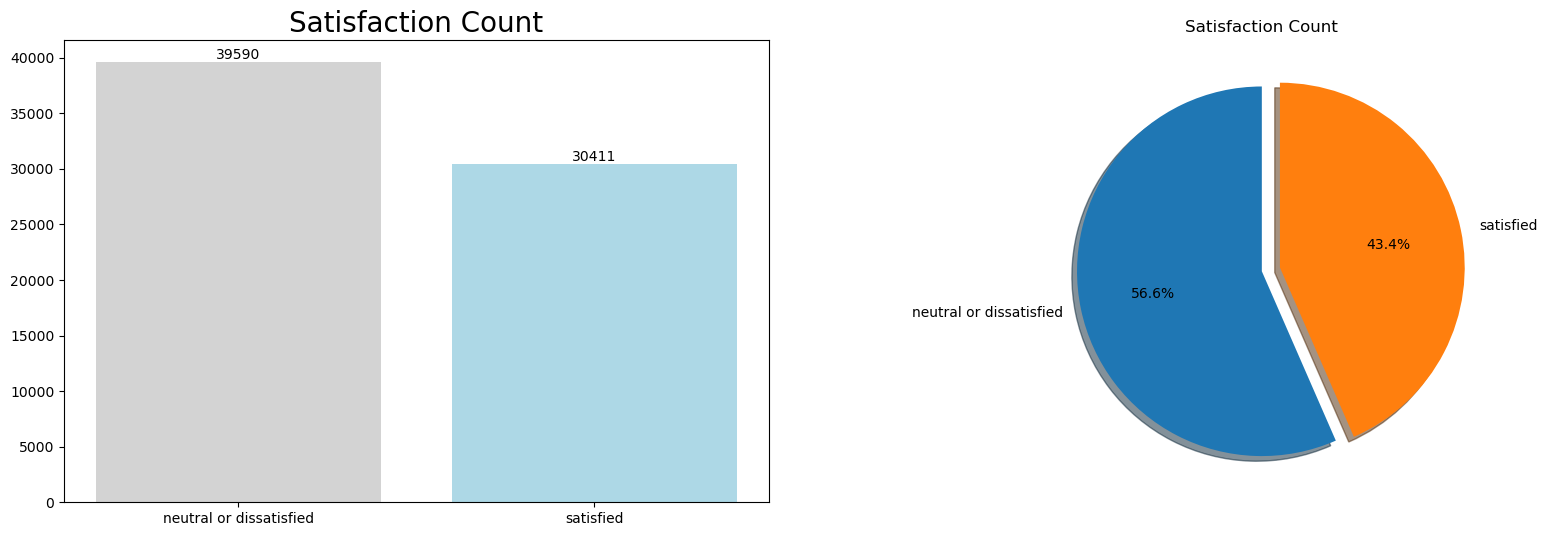

In [13]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize=(20,6))

# plot 1

ax1.bar(df["satisfaction"].value_counts().index,df["satisfaction"].value_counts(),color = ["lightgrey","lightblue"])
ax1.set_title("Satisfaction Count",fontsize = 20)
for bars in ax1.containers:    # for showing count
    ax1.bar_label(bars)

# plot 2

label = list(df['satisfaction'].value_counts().index)
value = list(df["satisfaction"].value_counts().values)
ax2.pie(value,labels=label,autopct="%1.1f%%",explode = (0,0.1),startangle = 90,shadow = True)
ax2.set_title("Satisfaction Count")

In [14]:
# Count of the classes in target column
df["satisfaction"].value_counts()

satisfaction
neutral or dissatisfied    39590
satisfied                  30411
Name: count, dtype: int64

Text(0.5, 1.0, 'customer_type')

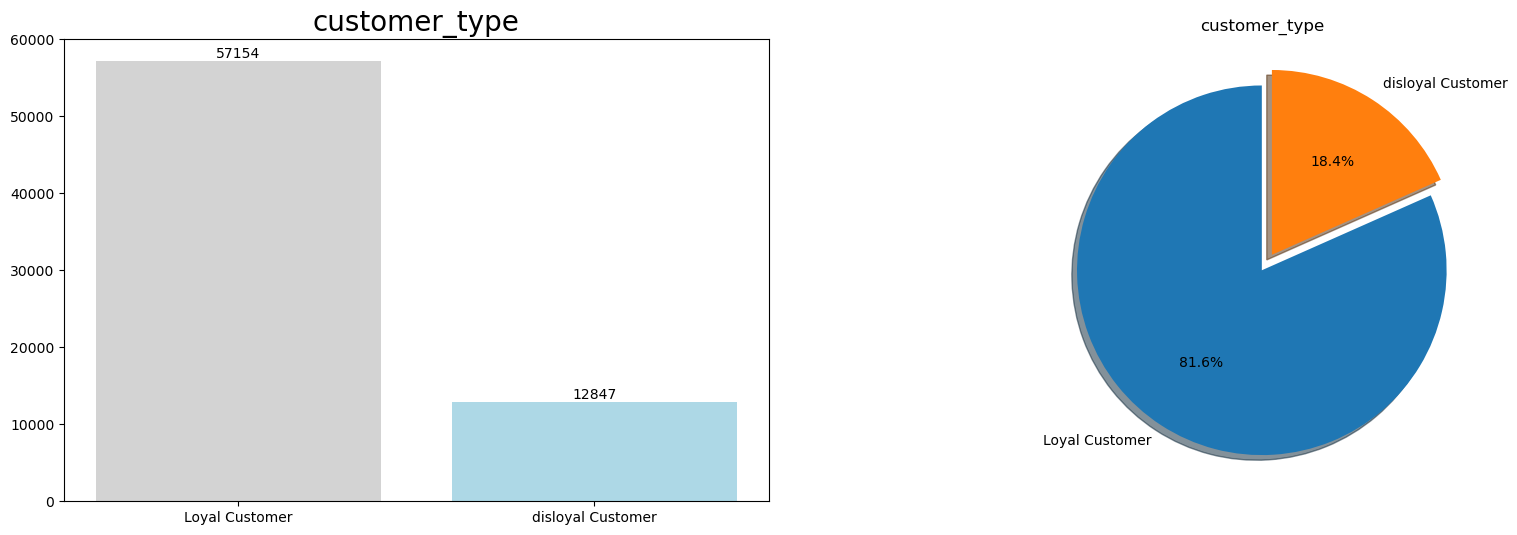

In [15]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize=(20,6))

# plot 1

ax1.bar(df["customer_type"].value_counts().index,df["customer_type"].value_counts(),color = ["lightgrey","lightblue"])
ax1.set_title("customer_type",fontsize = 20)
for bars in ax1.containers:    # for showing count
    ax1.bar_label(bars)

# plot 2

label = list(df['customer_type'].value_counts().index)
value = list(df["customer_type"].value_counts().values)
ax2.pie(value,labels=label,autopct="%1.1f%%",explode = (0,0.1),startangle = 90,shadow = True)
ax2.set_title("customer_type")

In [16]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns          # Checking the catogorical column in df 
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class',
       'satisfaction'],
      dtype='object')


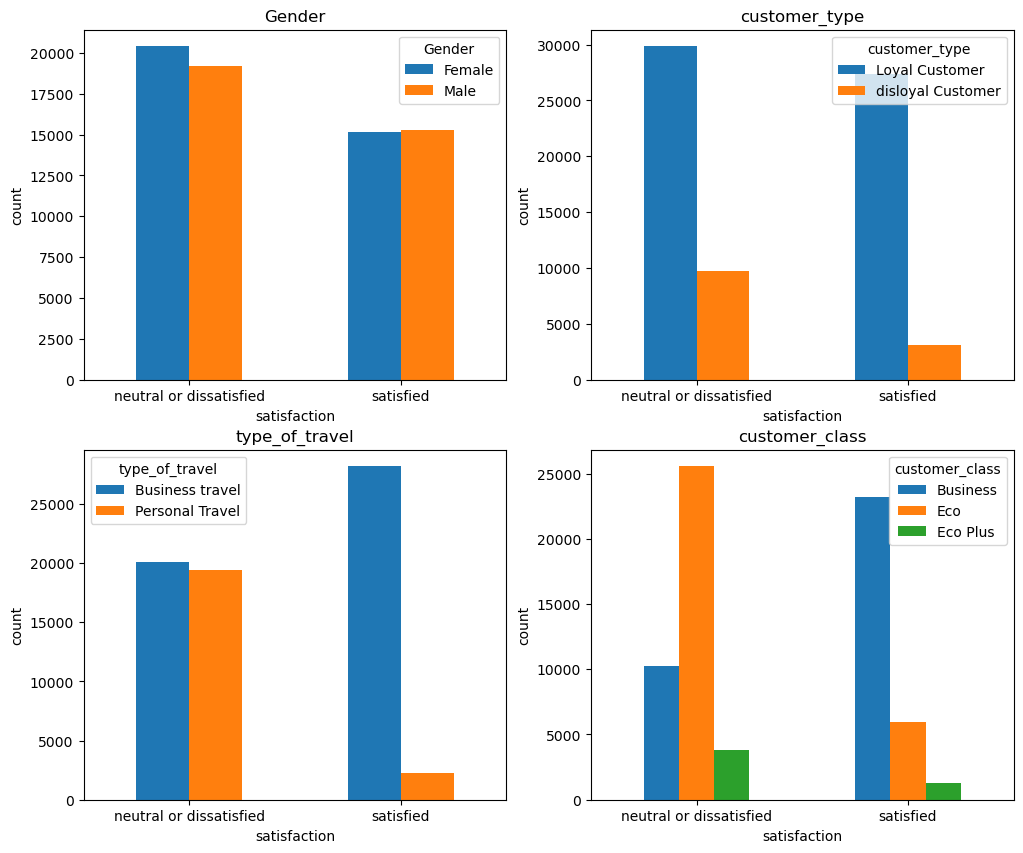

In [17]:
 ax,fig = plt.subplots(figsize=(12, 10), nrows=2, ncols=2)
# set x tickes rotation to 40

for i, col in enumerate(categorical_columns):
    if col != 'satisfaction':
      df.groupby("satisfaction")[col].value_counts().unstack().plot(kind='bar', ax=fig.flatten()[i])
      fig.flatten()[i].set_xticklabels(fig.flatten()[i].get_xticklabels(), rotation=0)
      fig.flatten()[i].set_title(col)
      fig.flatten()[i].set_ylabel('count')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'flight_distance'}>,
        <Axes: title={'center': 'inflight_wifi_service'}>,
        <Axes: title={'center': 'departure_arrival_time_convenient'}>],
       [<Axes: title={'center': 'ease_of_online_booking'}>,
        <Axes: title={'center': 'gate_location'}>,
        <Axes: title={'center': 'food_and_drink'}>,
        <Axes: title={'center': 'online_boarding'}>],
       [<Axes: title={'center': 'seat_comfort'}>,
        <Axes: title={'center': 'inflight_entertainment'}>,
        <Axes: title={'center': 'onboard_service'}>,
        <Axes: title={'center': 'leg_room_service'}>],
       [<Axes: title={'center': 'baggage_handling'}>,
        <Axes: title={'center': 'checkin_service'}>,
        <Axes: title={'center': 'inflight_service'}>,
        <Axes: title={'center': 'cleanliness'}>],
       [<Axes: title={'center': 'departure_delay_in_minutes'}>,
        <Axes: title={'center': 'arrival_delay_in_minutes'}>, <Ax

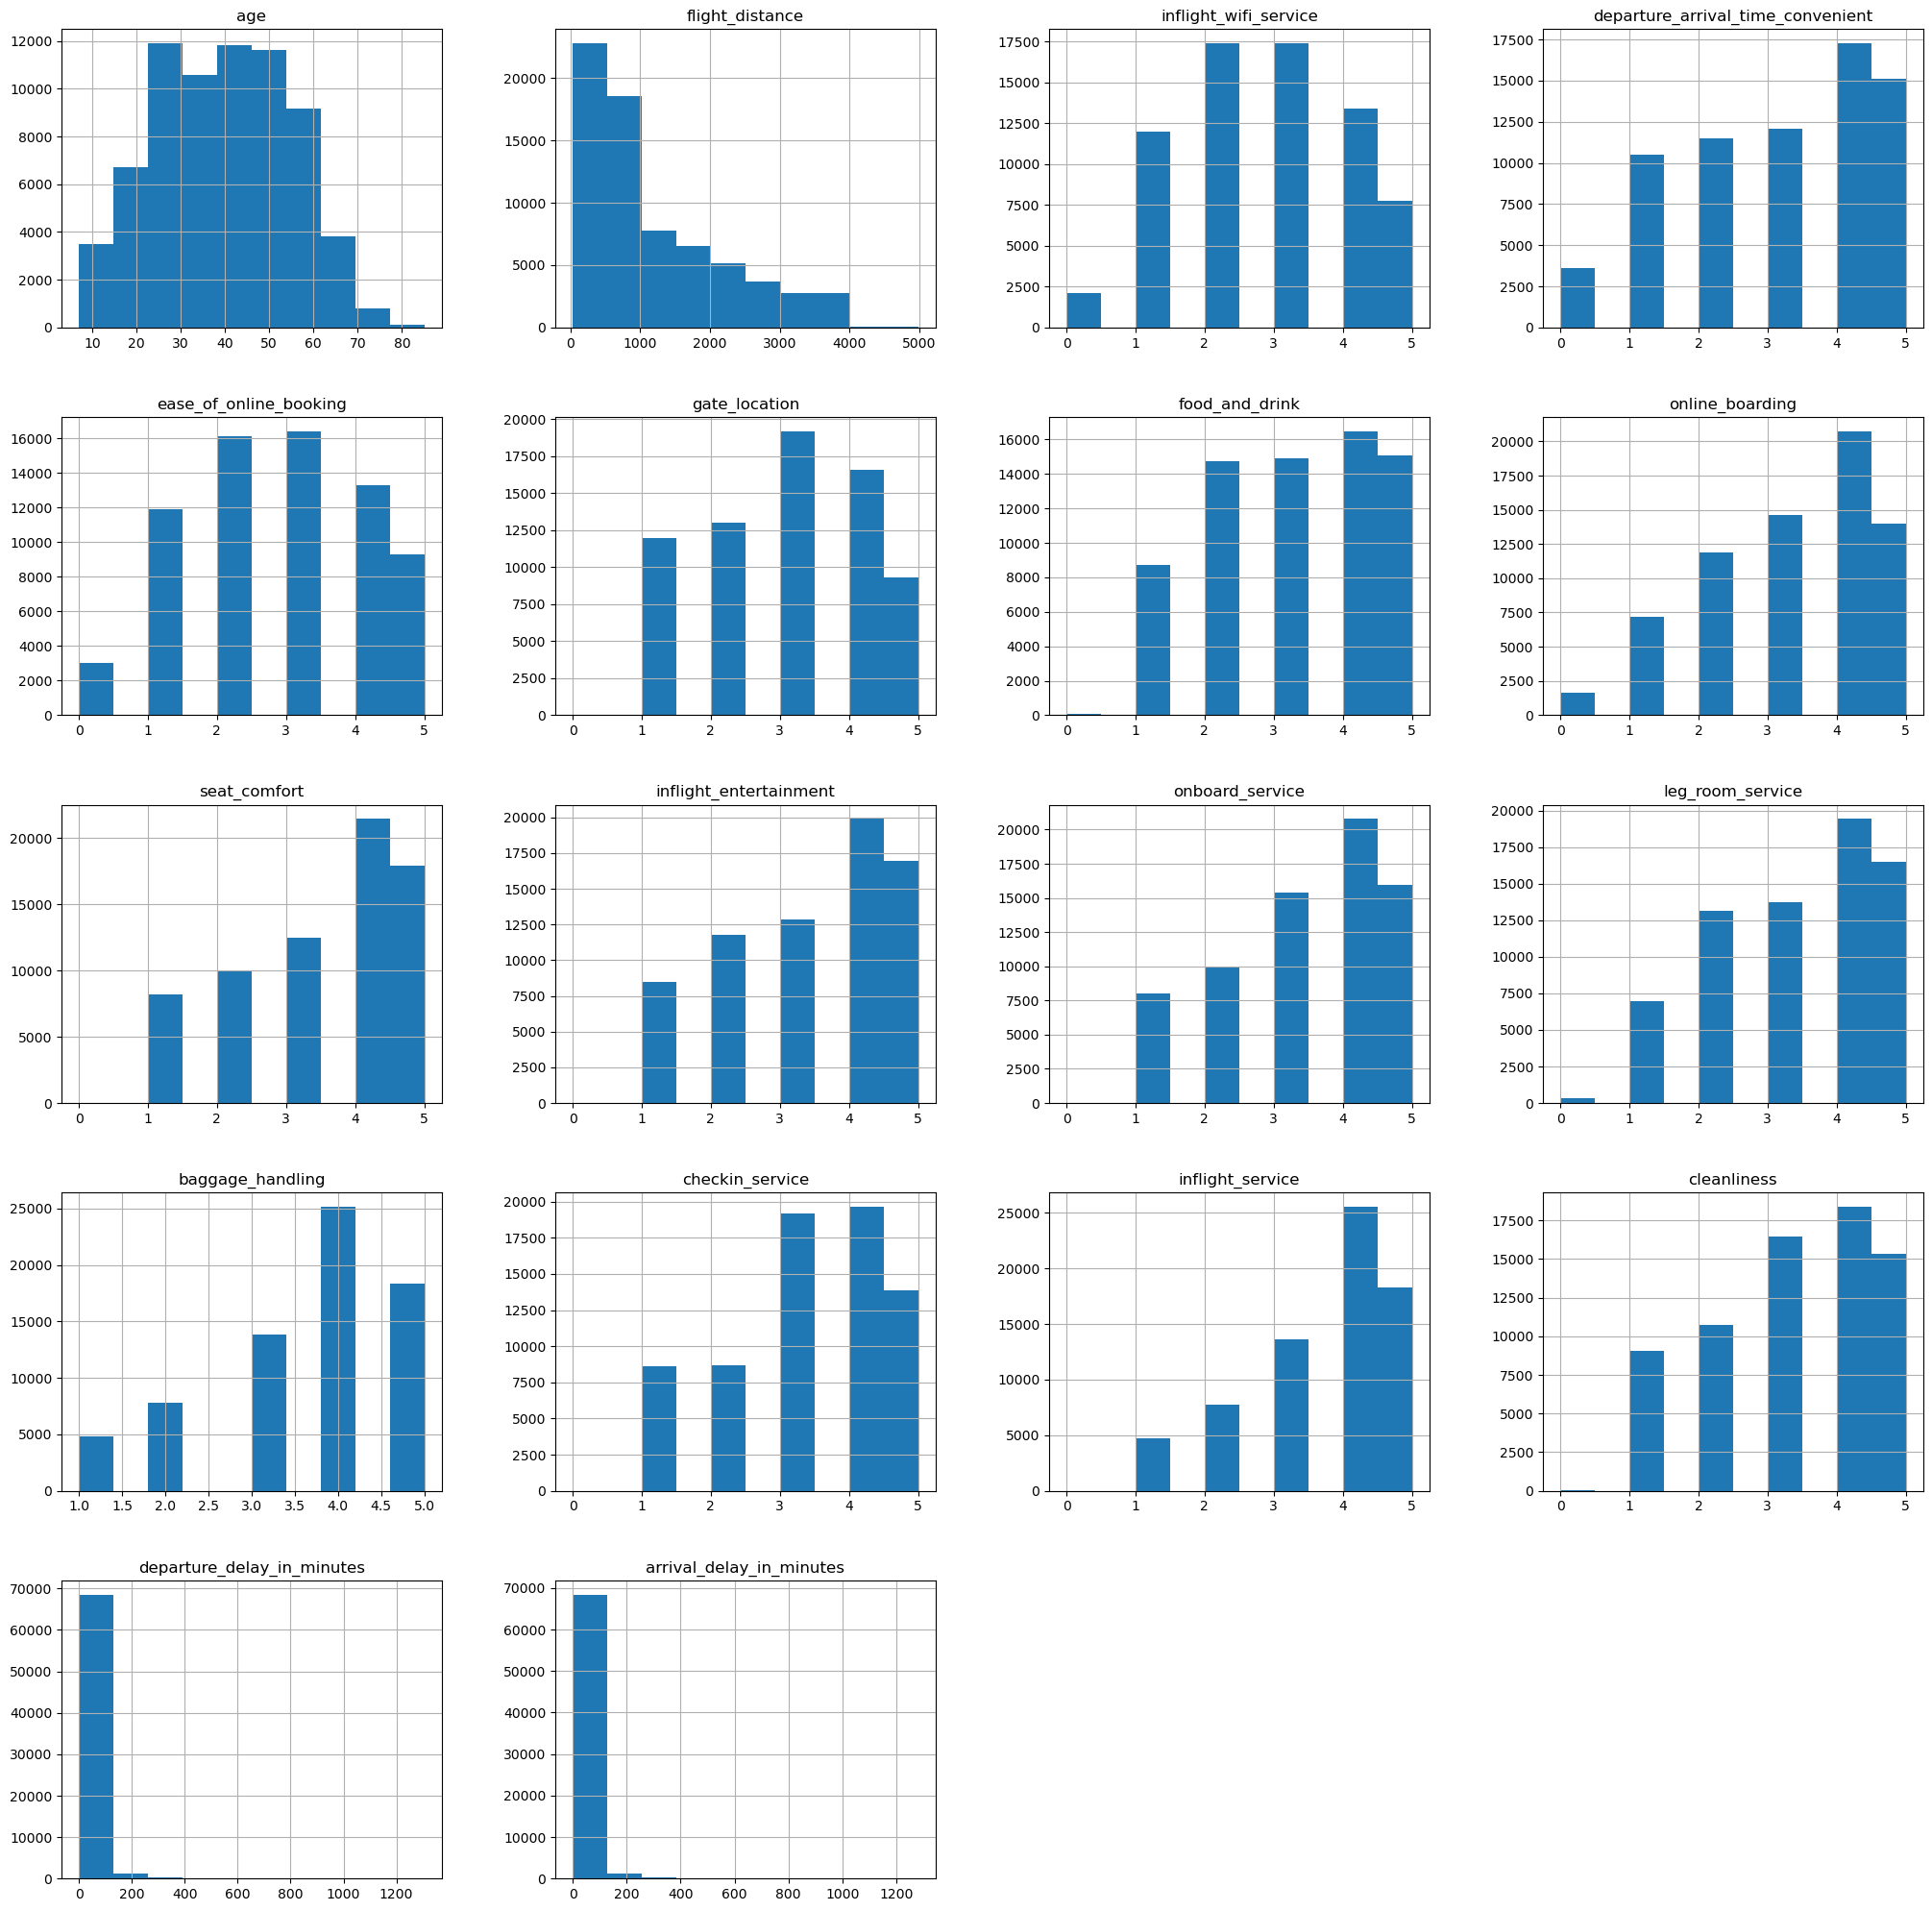

In [18]:
df.hist(figsize=(25,25))

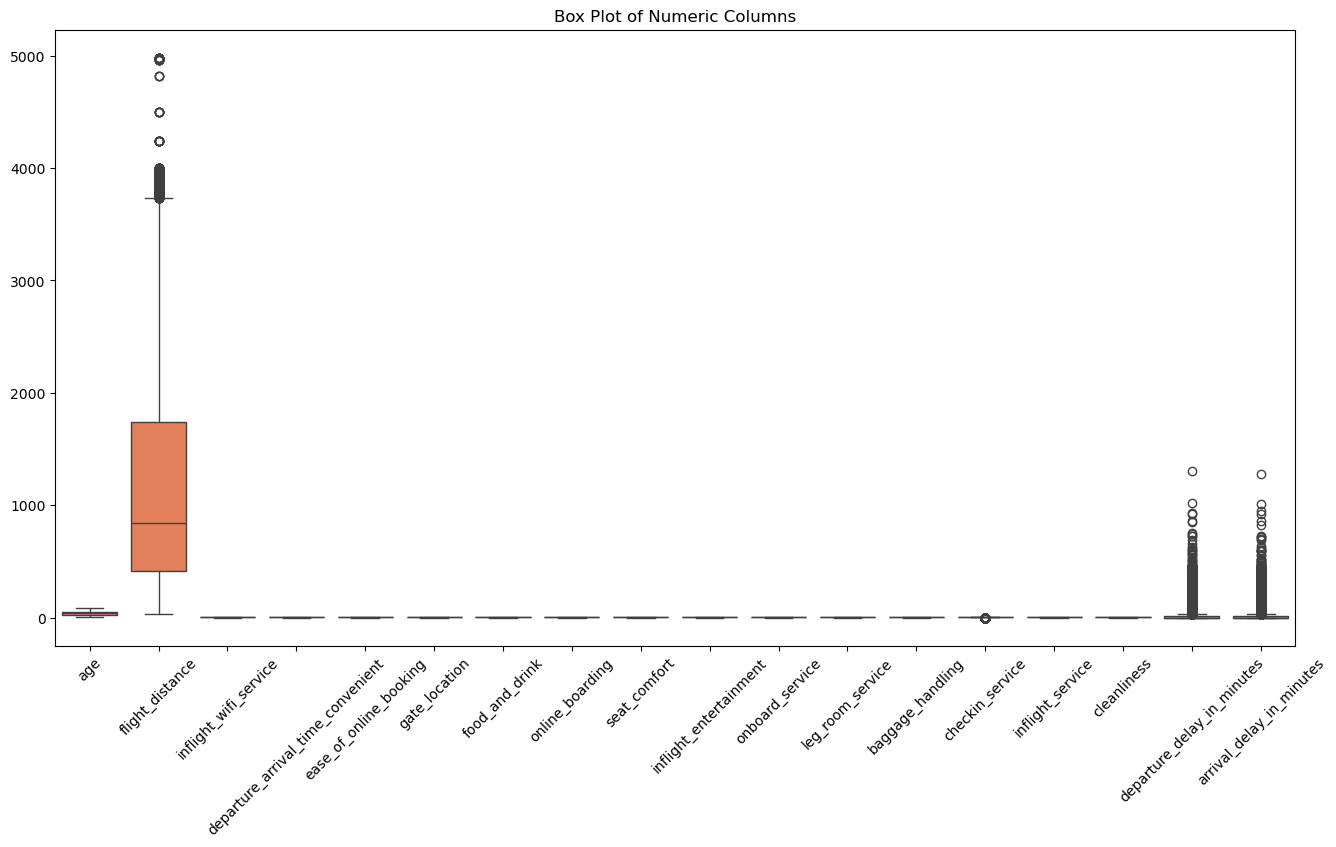

In [19]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 8))
sns.boxplot(data=numeric_df)

plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns')
plt.show()

Outlier Removing by IQR method

In [20]:
Q1 = df['departure_delay_in_minutes'].quantile(0.25)
Q3 = df['departure_delay_in_minutes'].quantile(0.75)
IQR1 = Q3 - Q1
print(IQR1)
df = df[~((df['departure_delay_in_minutes'] < (Q1 - 1.5 * IQR1)) | (df['departure_delay_in_minutes'] > (Q3 + 1.5 * IQR1)))]

Q2 = df['arrival_delay_in_minutes'].quantile(0.25)
Q4 = df['arrival_delay_in_minutes'].quantile(0.75)
IQR2 = Q4 - Q2
print(IQR2)
df = df[~((df['arrival_delay_in_minutes'] < (Q2 - 1.5 * IQR2)) | (df['arrival_delay_in_minutes'] > (Q4 + 1.5 * IQR2)))]

12.0
5.0


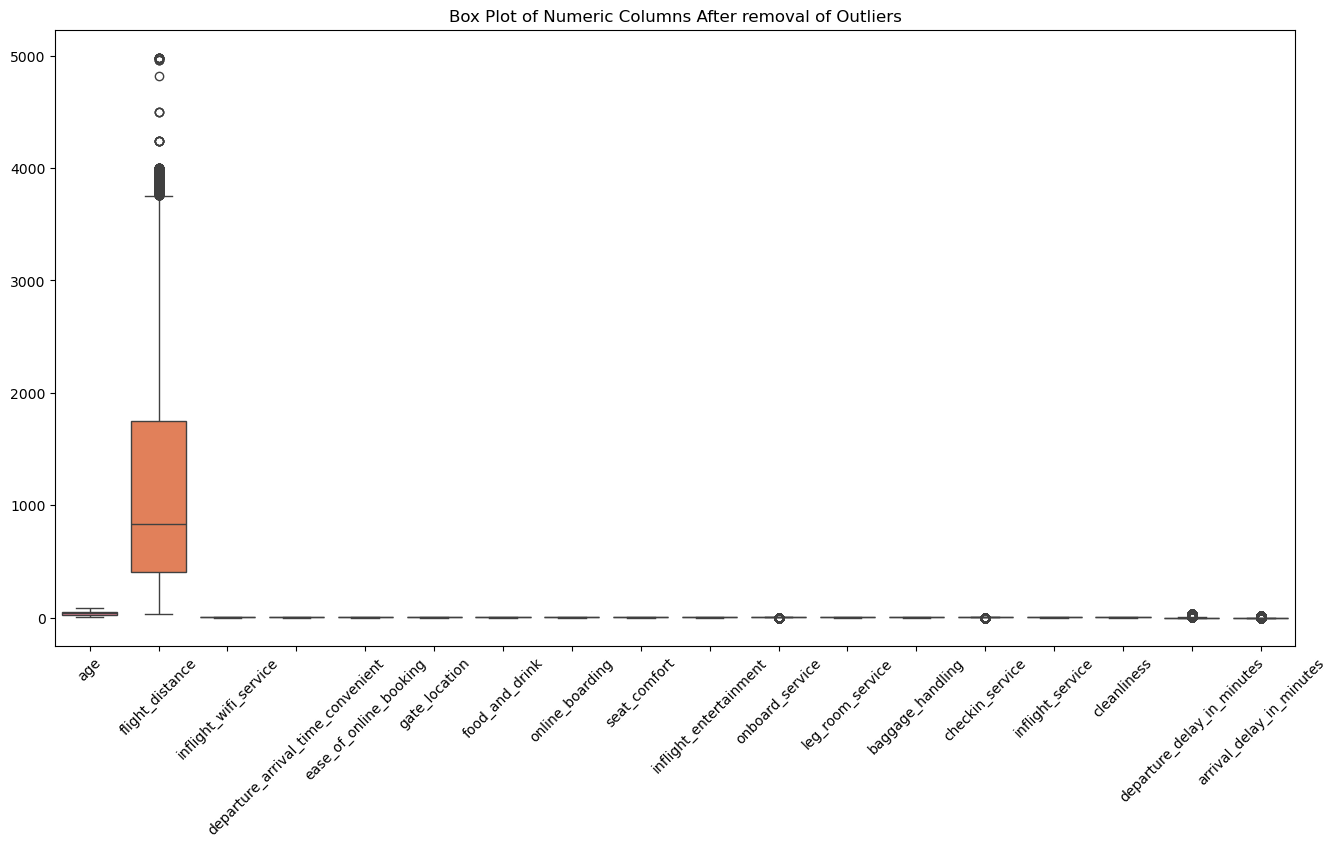

In [21]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16, 8))
sns.boxplot(data=numeric_df)

plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns After removal of Outliers')
plt.show()

In [22]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Example: Apply LabelEncoder to all categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Checking the transformed DataFrame
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
SR.NO,,,,,,,,,,,,,,,,,,,,,
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,0,0,26,1,1,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0


Spliting the Data 

In [23]:
x = df.drop(['satisfaction'],axis = 1)
y = df['satisfaction']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Normalise the data by scaler method

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Correlation of the data

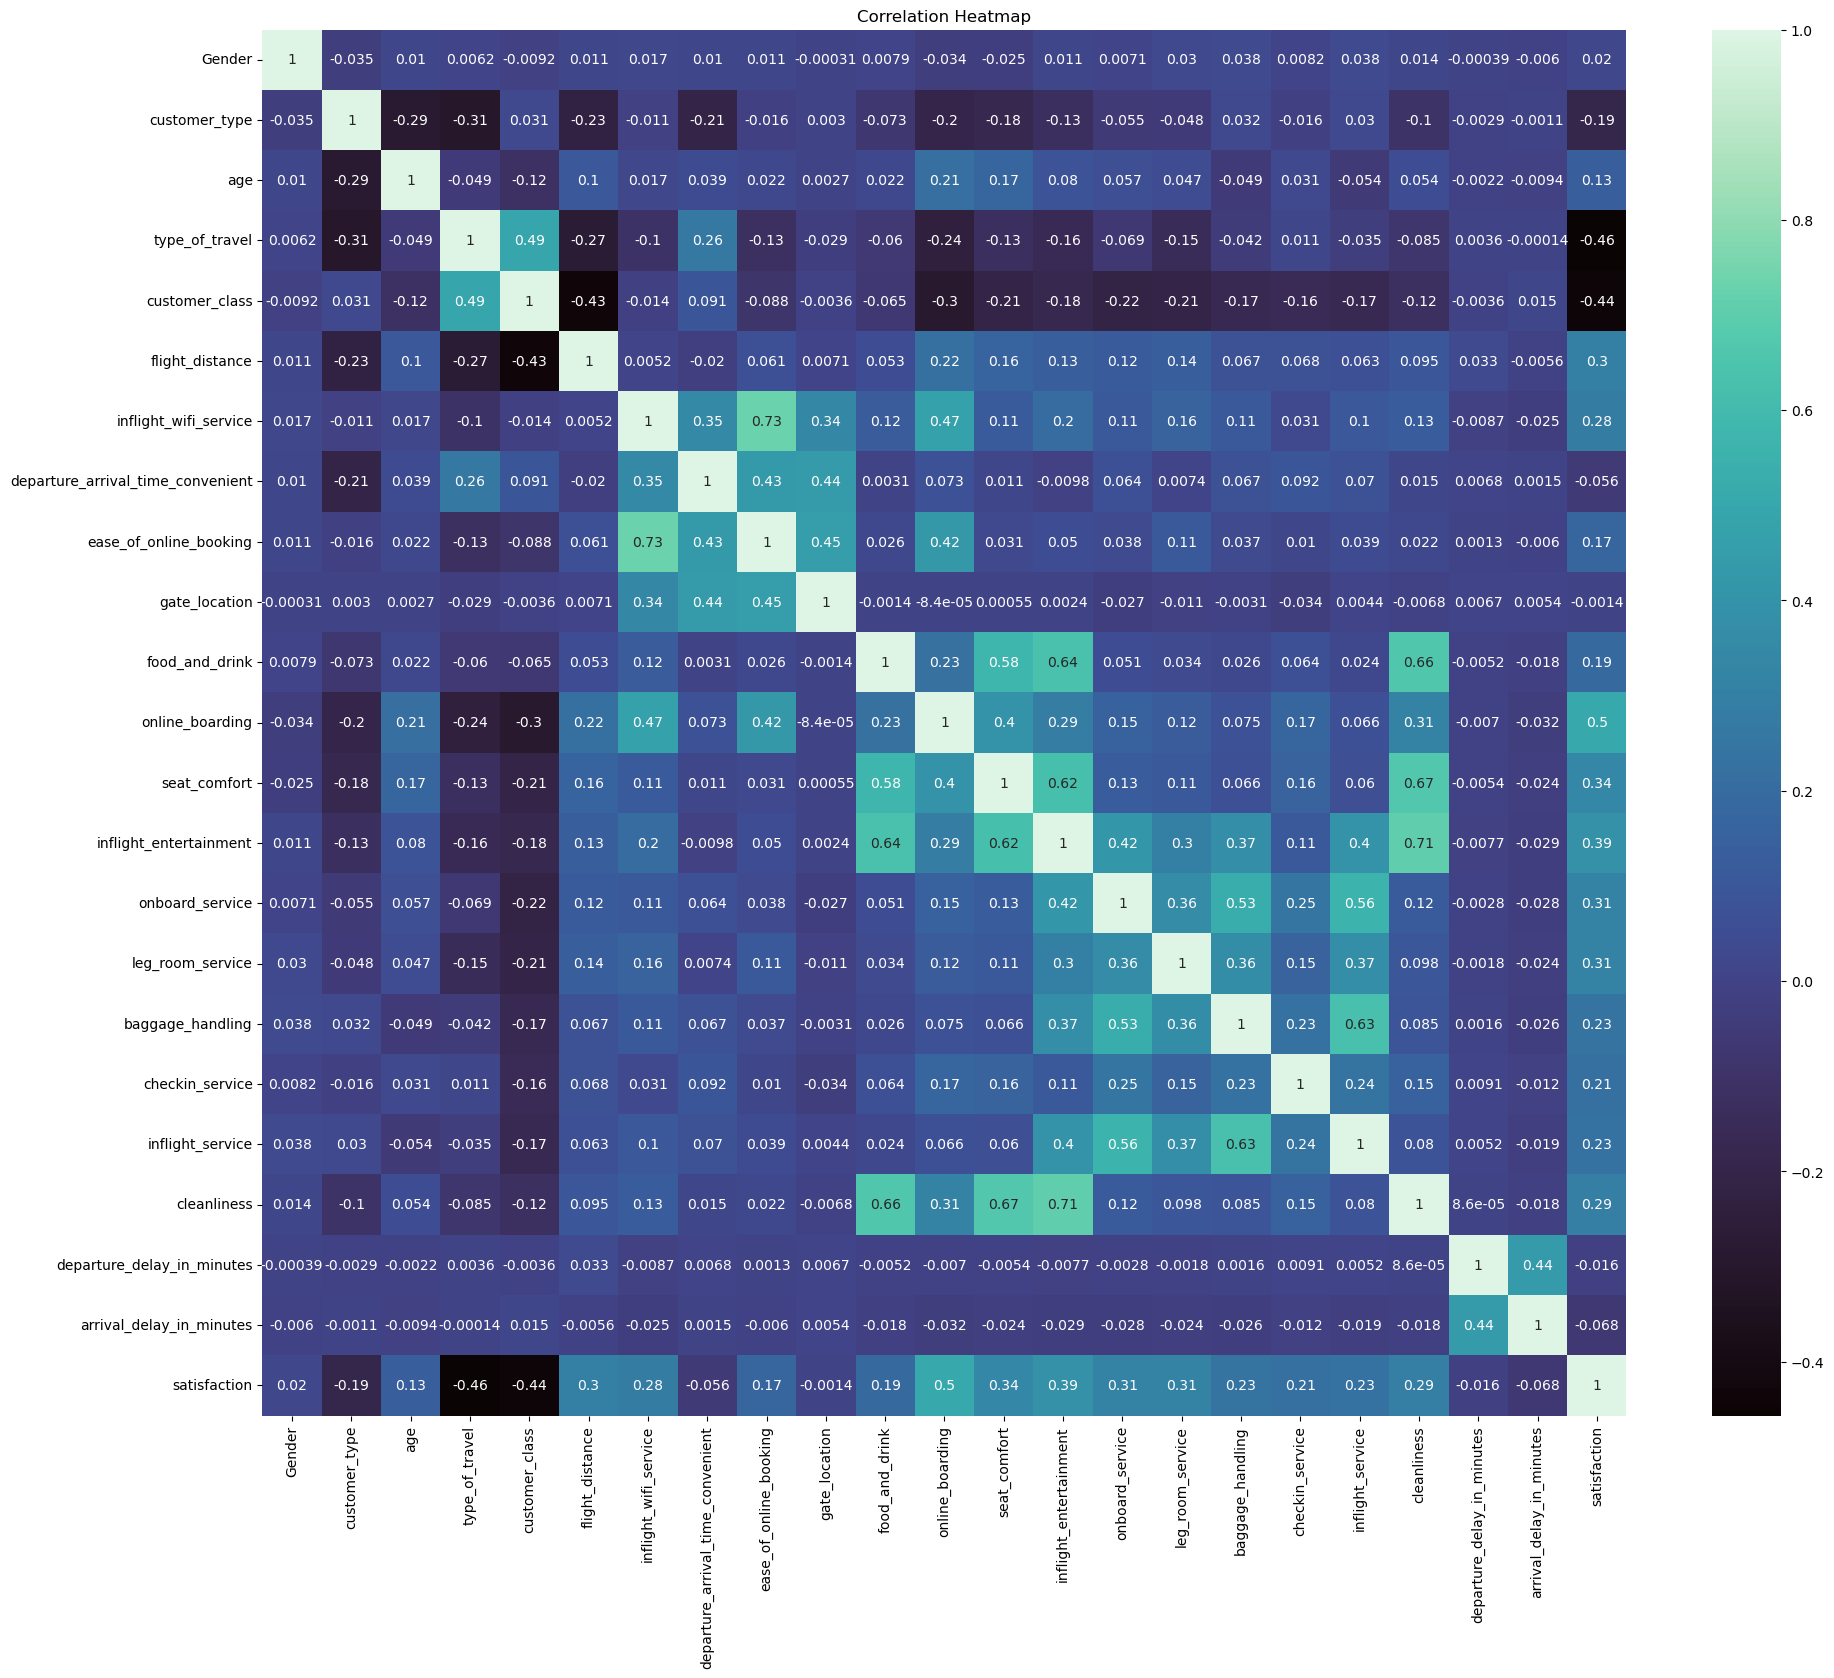

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(22,18))
sns.heatmap(correlation_matrix,annot=True , cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

LOGISTIC REGRESSION

In [27]:
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [28]:
y_pred = model.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.2f}')

Accuracy:0.88


In [30]:
#confusion matrix
confusion = confusion_matrix(y_test,y_pred)
print('Confusion Matrix :-')
print(confusion)

Confusion Matrix :-
[[5088  515]
 [ 759 3993]]


In [31]:
#Classification Report
classification_rep = classification_report(y_test,y_pred)
print("Classification report:-")
print(classification_rep)

Classification report:-
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5603
           1       0.89      0.84      0.86      4752

    accuracy                           0.88     10355
   macro avg       0.88      0.87      0.88     10355
weighted avg       0.88      0.88      0.88     10355



In [32]:
#ROC curve and AUC
y_pred_prob = model.predict_proba(x_test)[:,1] #This indexing selects the probabilities of the positive class (usually labeled as 1), 0 = negative class
roc_auc = roc_auc_score(y_test,y_pred_prob)
fpr , tpr, _ = roc_curve(y_test,y_pred_prob)

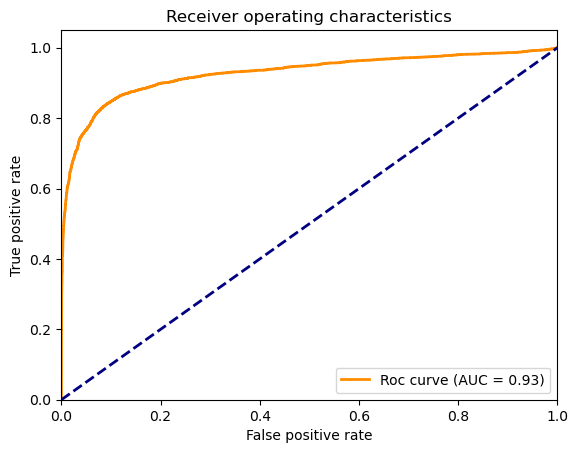

In [33]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'Roc curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristics')
plt.legend(loc='lower right')
plt.show()

<Axes: >

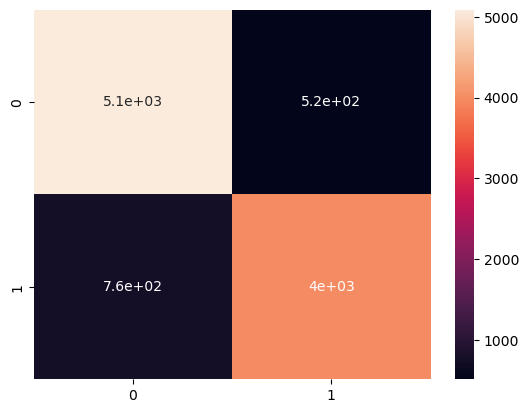

In [34]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

DECISION TREE CLASSIFICATION

In [35]:
# Create a decision tree classifier
model2= DecisionTreeClassifier()
model2.fit(x_train , y_train)

DecisionTreeClassifier()

In [36]:
y_pred_D = model2.predict(x_test) 

In [37]:
# Evaluate the model's performance
accuracy_d = metrics.accuracy_score(y_test, y_pred_D)
precision_d = metrics.precision_score(y_test, y_pred_D, average='weighted')
recall_d = metrics.recall_score(y_test, y_pred_D, average='weighted')
f1_score_d = metrics.f1_score(y_test, y_pred_D, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy_d:.2f}")
print(f"Precision: {precision_d:.2f}")
print(f"Recall: {recall_d:.2f}")
print(f"F1 Score: {f1_score_d:.2f}")


Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


RANDOM FOREST CLASSIFICATION

In [38]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred_R  = model3.predict(x_test)

In [40]:
# Evaluate the model's performance
accuracy_r = metrics.accuracy_score(y_test, y_pred_R)
precision_r = metrics.precision_score(y_test, y_pred_R, average='weighted')
recall_r = metrics.recall_score(y_test, y_pred_R, average='weighted')
f1_score_r = metrics.f1_score(y_test, y_pred_R, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy_r:.2f}")
print(f"Precision: {precision_r:.2f}")
print(f"Recall: {recall_r:.2f}")
print(f"F1 Score: {f1_score_r:.2f}")


Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


GRADIENT BOOSTING CLASSIFICATION

In [41]:
model4 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model4.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [42]:
y_pred_gb = model4.predict(x_test)

In [43]:
# Evaluate the model's performance
accuracy_gb = metrics.accuracy_score(y_test, y_pred_gb)
precision_gb = metrics.precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = metrics.recall_score(y_test, y_pred_gb, average='weighted')
f1_score_gb = metrics.f1_score(y_test, y_pred_gb, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1 Score: {f1_score_gb:.2f}")

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


SVM 

In [44]:
svm_model = SVC(kernel='linear',random_state=42)

In [45]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [46]:
y_pred_svm = svm_model.predict(x_test)

In [47]:
# Evaluate the model's performance
accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
precision_svm = metrics.precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = metrics.recall_score(y_test, y_pred_svm, average='weighted')
f1_score_svm = metrics.f1_score(y_test, y_pred_svm, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm :.2f}")
print(f"F1 Score: {f1_score_svm:.2f}")


Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


KNN CLASSIFIER

In [48]:
# Function to choose the value of k
def choose_k(x_train, y_train, x_test, y_test, max_k=10):
    k_values = list(range(1, max_k+1))
    accuracy_values = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    
    # Visualize the accuracy for different k values
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
    plt.title('Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    best_k = k_values[accuracy_values.index(max(accuracy_values))]
    return best_k

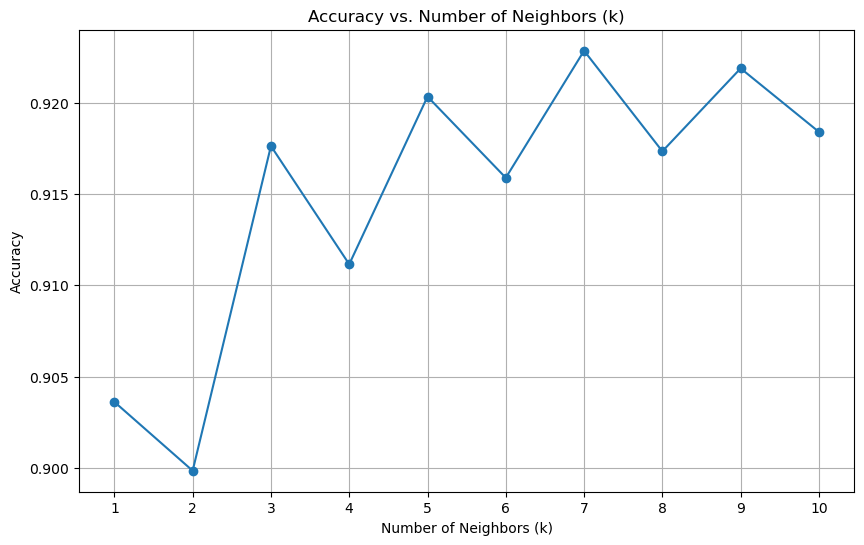

Best k: 7


In [49]:
# Choose the best k value
best_k = choose_k(x_train, y_train, x_test, y_test)
print("Best k:", best_k)

In [50]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [51]:
y_pred_knn = knn.predict(x_test)

In [52]:
# Evaluate the model's performance
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
precision_knn = metrics.precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = metrics.recall_score(y_test, y_pred_knn, average='weighted')
f1_score_knn = metrics.f1_score(y_test, y_pred_knn, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_score_knn:.2f}")


Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92


In [53]:
# Compare the results of all models
print("--Comparison of Models:--")
print(f"Logestic Regression Accuracy: {accuracy:.2f}")
print(f"Decision Tree Accuracy: {accuracy_d:.2f}")
print(f"Random Forest Accuracy: {accuracy_r:.2f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"KNN Classifier Accuracy: {accuracy_knn:.2f}")

--Comparison of Models:--
Logestic Regression Accuracy: 0.88
Decision Tree Accuracy: 0.94
Random Forest Accuracy: 0.96
Gradient Boosting Accuracy: 0.94
SVM Accuracy: 0.88
KNN Classifier Accuracy: 0.92


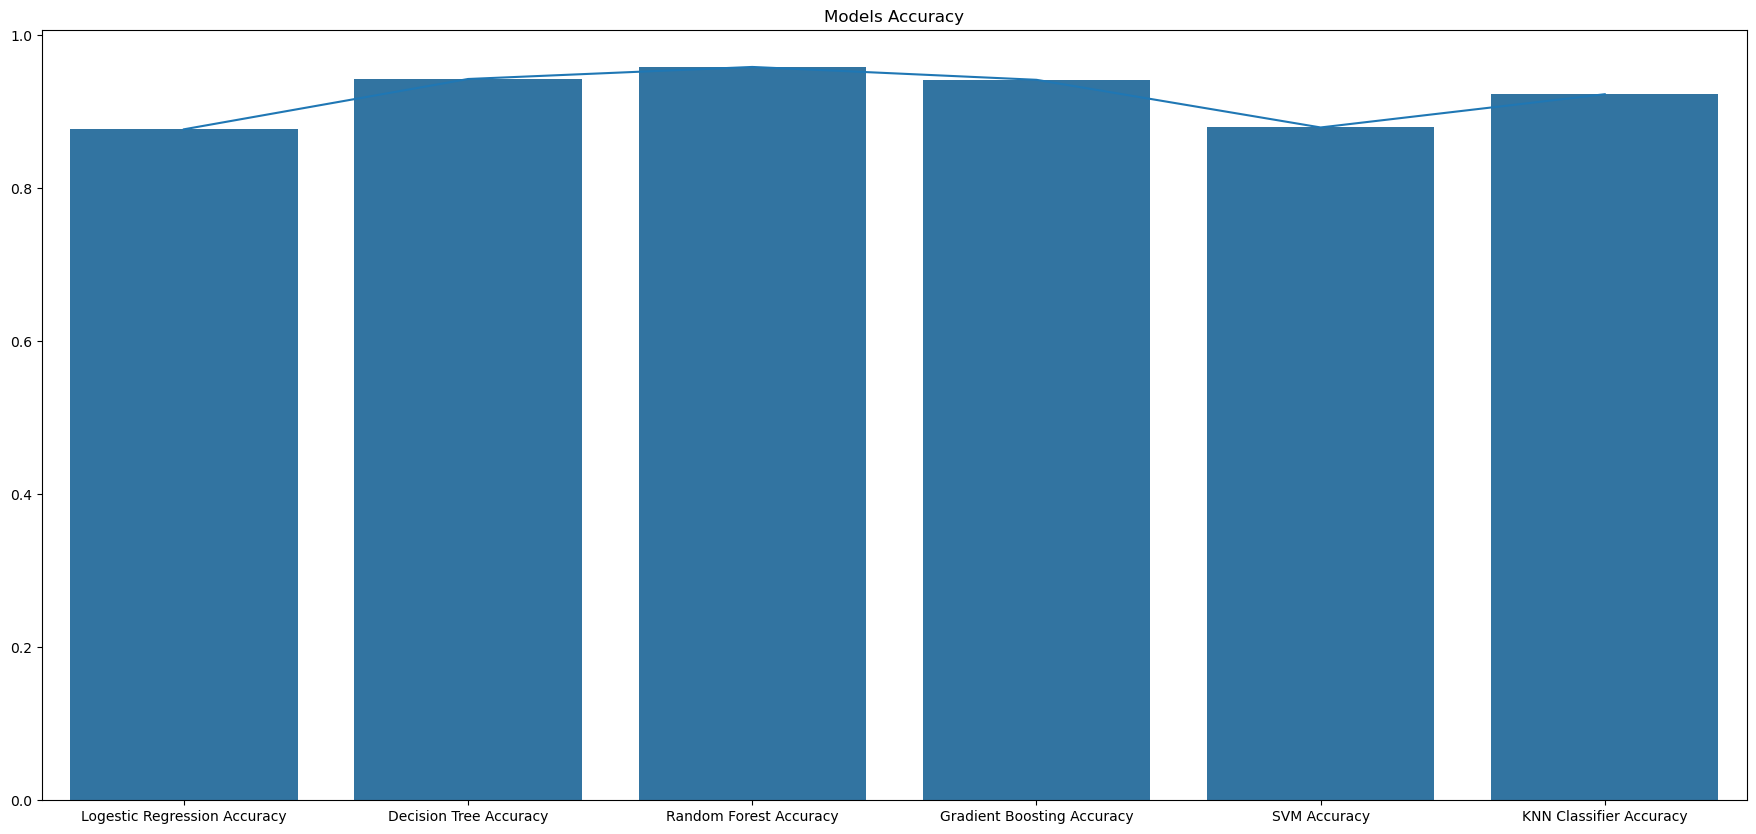

In [54]:
plt.figure(figsize=(22,10))
list1=[accuracy, accuracy_d, accuracy_r, accuracy_gb, accuracy_svm, accuracy_knn]
list2=['Logestic Regression Accuracy','Decision Tree Accuracy','Random Forest Accuracy','Gradient Boosting Accuracy','SVM Accuracy','KNN Classifier Accuracy']
plt.plot(list1)
sns.barplot(x =list2 , y =list1)
plt.title('Models Accuracy')
plt.show()


In [55]:
# Set up the parameter grid
"""param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x, y)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_) """

'param_grid = {\n    \'n_estimators\': [50, 100, 200],        # Number of trees in the forest\n    \'max_depth\': [None, 10, 20, 30],       # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10],       # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4],         # Minimum number of samples required to be at a leaf node\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'], # Number of features to consider when looking for the best split\n    \'bootstrap\': [True, False]             # Whether bootstrap samples are used when building trees\n}\n\n# Set up the GridSearchCV\ngrid_search = GridSearchCV(estimator=model3, param_grid=param_grid,\n                           cv=5, n_jobs=-1, verbose=2)\n\n# Fit the model\ngrid_search.fit(x, y)\n\n# Best parameters and best score\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Score:", grid_search.best_score_) '

In [56]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred_xgb = model.predict(x_test)

accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
print(f'Accuracy:{accuracy_xgb:.2f}')

Accuracy:0.88


In [57]:
# Initialize CatBoostClassifier
modelcat = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, verbose=0)
modelcat.fit(x_train, y_train)

y_pred_cat = modelcat.predict(x_test)

accuracy_cat = accuracy_score(y_test,y_pred_cat)
print(f'Accuracy:{accuracy_cat:.2f}')


Accuracy:0.96


In [58]:
model_ada = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
model_ada.fit(x_train, y_train)

y_pred_ada = model_ada.predict(x_test)

accuracy_ada = accuracy_score(y_test,y_pred_ada)
print(f'Accuracy:{accuracy_ada:.2f}')

Accuracy:0.93


K_FOLD CROSS VALIDATION

In [59]:
k = 5
cv_scores = cross_val_score(model3, x, y, cv=k)

In [60]:
print(f"Cross-Validation Scores (K={k}): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores (K=5): [0.95586673 0.95924674 0.95702559 0.95296504 0.95779409]
Mean Accuracy: 0.96
Standard Deviation: 0.00
